In [82]:
import numpy as np
import matplotlib.pyplot as plt

# "Dataset"
x = np.random.rand(100)
y = 5*x*x+1.0*np.random.rand(100)

In [83]:
# Design matrix
X = np.zeros((len(x),3))
X[:,0] = 1
X[:,1] = x
X[:,2] = x*x

# find parameters
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# make prediction
ytilde = X @ beta

beta0: 0.3679592083011269
beta1: 0.361791598963332
beta2: 4.81746816905434


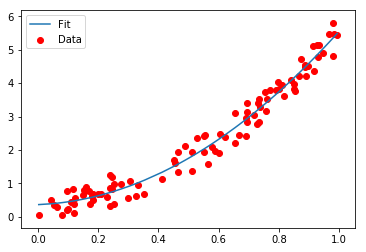

In [84]:
#sort data
order = np.argsort(x)
xs = np.array(x)[order]
ytildes = np.array(ytilde)[order]

print('beta0:', beta[0])
print('beta1:', beta[1])
print('beta2:', beta[2])

# Make plots to compare
fig,ax = plt.subplots()
ax.plot(xs,ytildes,label='Fit')
ax.scatter(x,y,c='r',label='Data')
ax.legend()
plt.show()

# 2

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [86]:
poly2 = PolynomialFeatures(degree=2)
Xskl = poly2.fit_transform(x[:,np.newaxis])
clf2 = LinearRegression()
clf2.fit(Xskl,y) #does this mess up y?
ypredict = clf2.predict(Xskl)

beta0: 0.36795920830113027
beta1: 0.36179159896333124
beta2: 4.817468169054312


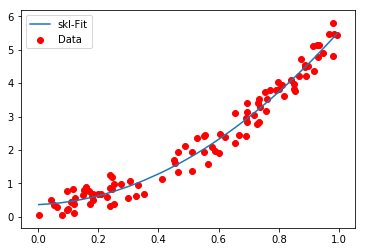

In [87]:
print('beta0:', clf2.intercept_)
print('beta1:', clf2.coef_[1])
print('beta2:', clf2.coef_[2])

# Make plots to compare
fig,ax = plt.subplots()
poly2_plot = plt.plot(xs, ypredict[order], label='skl-Fit')
ax.scatter(x,y,c='r',label='Data')
ax.legend()
plt.show()

In [88]:
#differences
print('beta0:', beta[0]-clf2.intercept_)
print('beta0:', beta[1]-clf2.coef_[1])
print('beta0:', beta[2]-clf2.coef_[2])

beta0: -3.3861802251067274e-15
beta0: 7.771561172376096e-16
beta0: 2.842170943040401e-14


# 3

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_model)) ** 2)

In [91]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [92]:
# The mean squared error                               
print("Mean squared error (skl): %.2f" % mean_squared_error(y, ypredict))
print("Mean squared error (slf): %.2f" % MSE(y, ytilde))

# Explained variance score: 1 is perfect prediction                                 
print('Variance score (skl): %.2f' % r2_score(y, ypredict))
print('Variance score (slf): %.2f' %R2(y, ytilde))

Mean squared error (skl): 0.08
Mean squared error (slf): 0.08
Variance score (skl): 0.97
Variance score (slf): 0.97
